In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
w1 = 10
w2 = 7
g1 = .8
g2 = .8
k = 4

In [79]:
def dY(Y, k, w1, w2, g1, g2):
  a1 = Y[0]
  a2 = Y[1]
  Da1 = (0.5*k - 1j*w1 - g1*abs(a1)**2)*a1 + 0.5*k * (a2 - a1)
  Da2 = (0.5*k - 1j*w2 - g1*abs(a2)**2)*a2 + 0.5*k * (a1 - a2)
  return np.array([Da1, Da2])


In [80]:
# RK4 implementation
NT = 1000
tf = 10
Y = np.zeros((NT,2),dtype=complex)
Y0 = np.array([1, 1j],dtype=complex)


Y[0,:] = Y0
h = tf/NT
for j in range(NT-1):
  k1 = dY(Y[j,:], k, w1, w2, g1, g2)
  k2 = dY(Y[j,:] + h*k1/2, k, w1, w2, g1, g2)
  k3 = dY(Y[j,:] + h*k2/2, k, w1, w2, g1, g2)
  k4 = dY(Y[j,:] + h*k3, k, w1, w2, g1, g2)
  Y[j+1,:]=Y[j,:]+(1./6.)*(k1+2*k2+2*k3+k4)*h

(-1.0, 1.0)

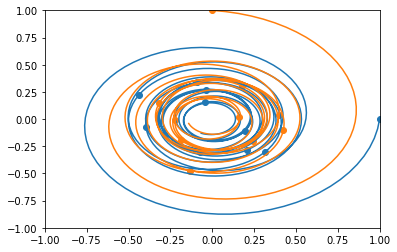

In [81]:
plt.plot(np.real(Y[:,0]), np.imag(Y[:,0]))
plt.plot(np.real(Y[:,1]), np.imag(Y[:,1]))
plt.scatter(np.real(Y[::100,0]), np.imag(Y[::100,0]))
plt.scatter(np.real(Y[::100,1]), np.imag(Y[::100,1]))
plt.xlim(-1,1)
plt.ylim(-1,1)

In [87]:
def stuart_landau(Y0, w1=1, w2=2, g1=2,g2=2,k=1, tf = 1, NT=100):
  T = np.linspace(0, tf, NT)

  # RK4 implementation
  Y = np.zeros((NT,2),dtype=complex)

  Y[0,:] = Y0
  h = tf/NT
  for j in range(NT-1):
    k1 = dY(Y[j,:], k, w1, w2, g1, g2)
    k2 = dY(Y[j,:] + h*k1/2, k, w1, w2, g1, g2)
    k3 = dY(Y[j,:] + h*k2/2, k, w1, w2, g1, g2)
    k4 = dY(Y[j,:] + h*k3, k, w1, w2, g1, g2)
    Y[j+1,:]=Y[j,:]+(1./6.)*(k1+2*k2+2*k3+k4)*h
  return T, Y

In [149]:
Y01 = np.array([1,1j])
Y02 = np.array([1.1+.2j, -.4j])
T, Y1 = stuart_landau(Y01, w1=10, w2=7, g1=5, g2=5,k=10 ,tf =4, NT=500)
T, Y2 = stuart_landau(Y02, w1=10, w2=7, g1=5, g2=5,k=10 ,tf =4, NT=500)

(-2.0, 2.0)

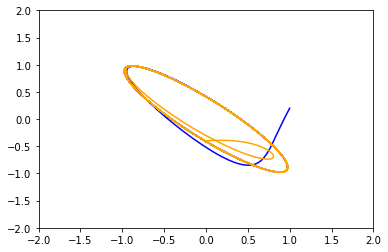

In [150]:

plt.plot(np.real(Y1[:,0]), np.imag(Y2[:,0]),color='blue')
plt.plot(np.real(Y1[:,1]), np.imag(Y2[:,1]),color='orange')
#plt.scatter(np.real(Y2[::20,0]), np.imag(Y2[::20,0]),color='blue')
#plt.scatter(np.real(Y2[::20,1]), np.imag(Y2[::20,1]),color='orange')
plt.xlim(-2,2)
plt.ylim(-2,2)

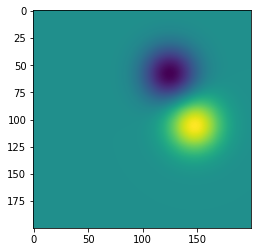

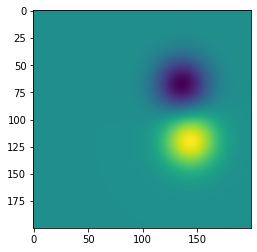

In [174]:
j = 100
s = .5
x = np.linspace(-2,2,200)
p = np.linspace(-2,2,200)
X, P = np.meshgrid(x,p)
def W_c(X, P, alpha):
  return np.exp(-(X -np.real(alpha))**2/s**2 - (P - np.imag(alpha))**2/s**2)

W = W_c(X,P,Y1[j,0])
Wj1 = W_c(X,P, Y1[j, 0]) - W_c(X,P, Y2[j, 0])
Wj2 = W_c(X,P, Y1[j, 1]) - W_c(X,P, Y2[j, 1])
plt.imshow(Wj1)
plt.show()
plt.imshow(Wj2)

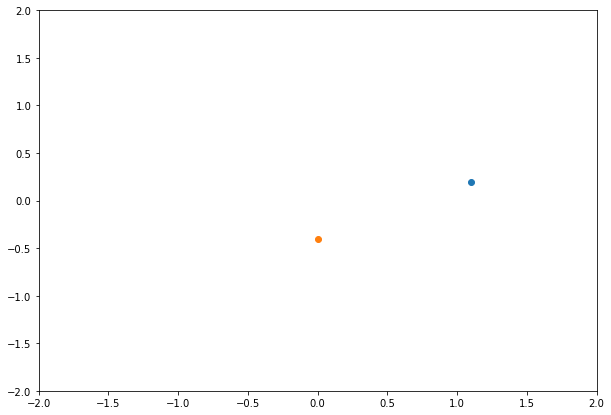

In [152]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlim = (-2,2), ylim=(-2,2))
a0 = ax.plot(np.real(Y[0,0]), np.imag(Y[0,0]),marker='o')[0]
a1 = ax.plot(np.real(Y[0,1]), np.imag(Y[0,1]),marker='o')[0]

def animate(i):
  a0.set_xdata(np.real(Y2[i,0]))
  a0.set_ydata(np.imag(Y2[i,0]))
  a1.set_xdata(np.real(Y2[i,1]))
  a1.set_ydata(np.imag(Y2[i,1]))


anim = FuncAnimation(fig, animate, interval=100, frames=len(T)-1)
plt.draw()
plt.show()
anim.save('filename.mp4')

Text(0, 0.5, 'distance')

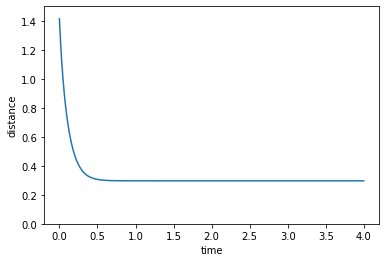

In [142]:
d = abs(Y2[:,1] - Y2[:,0])
plt.plot(T,d)
plt.ylim(0,1.5)
plt.xlabel('time')
plt.ylabel('distance')